In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import Input
# from tensorflow.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import itertools

In [2]:
import os
train_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filetrain'
valid_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filevalid'

In [3]:
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

Found 767 images belonging to 10 classes.
Found 167 images belonging to 10 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#LopCNN1
model.add(Conv2D(4,(3,3), activation='relu',input_shape=(48,48,3)))
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))
#LopCNN2
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(80,activation=tf.nn.relu))

model.add(Dense(10, activation=tf.nn.softmax))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 4)         112       
                                                                 
 dropout (Dropout)           (None, 46, 46, 4)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [9]:
EPOCHS=80
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/80
20/20 [==============================] - 3s 110ms/step - loss: 2.3203 - acc: 0.1628 - val_loss: 2.2185 - val_acc: 0.2313
Epoch 2/80
20/20 [==============================] - 1s 43ms/step - loss: 2.0351 - acc: 0.2864 - val_loss: 2.0899 - val_acc: 0.2875
Epoch 3/80
20/20 [==============================] - 1s 46ms/step - loss: 1.7220 - acc: 0.4000 - val_loss: 1.8979 - val_acc: 0.3375
Epoch 4/80
20/20 [==============================] - 1s 37ms/step - loss: 1.4780 - acc: 0.4930 - val_loss: 1.7836 - val_acc: 0.4187
Epoch 5/80
20/20 [==============================] - 1s 41ms/step - loss: 1.2482 - acc: 0.5634 - val_loss: 1.5722 - val_acc: 0.4750
Epoch 6/80
20/20 [==============================] - 1s 41ms/step - loss: 1.0906 - acc: 0.6213 - val_loss: 1.5526 - val_acc: 0.5000
Epoch 7/80
20/20 [==============================] - 1s 40ms/step - loss: 0.9535 - acc: 0.6901 - val_loss: 1.3830 - val_acc: 0.6375
Epoch 8/80
20/20 [==============================] - 1s 45ms/step - loss: 0.7995 - 

In [10]:
model.save('modelTest.h5')

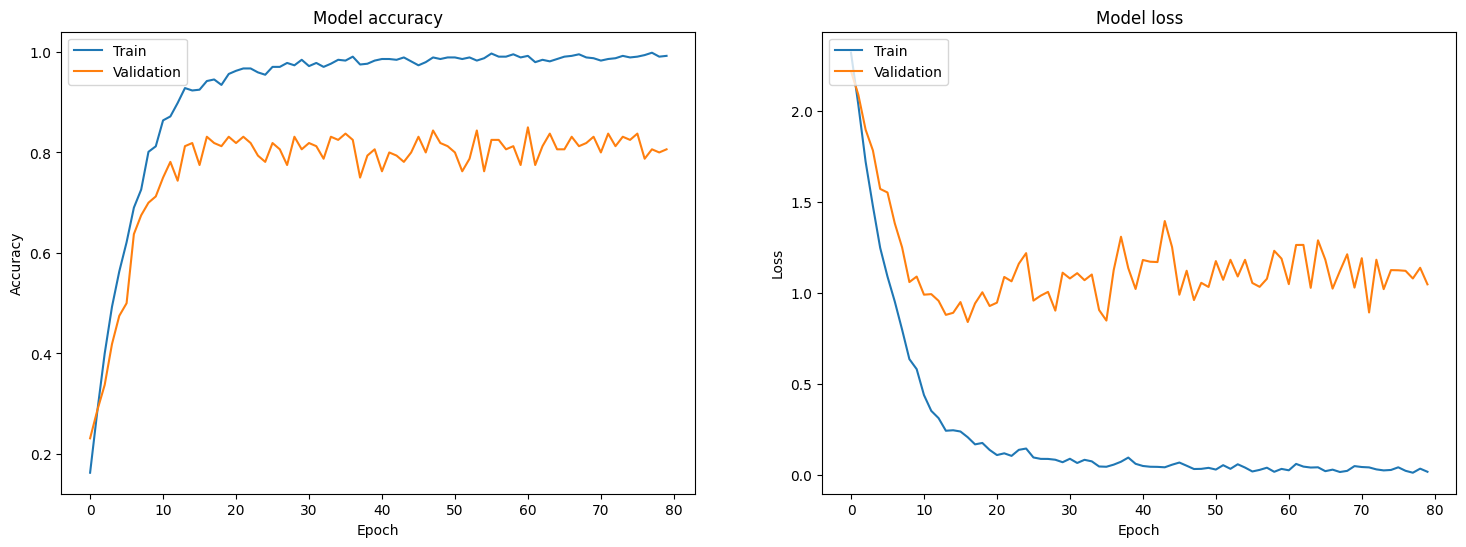

In [11]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 30ms/step
Gia tri du doan: 8


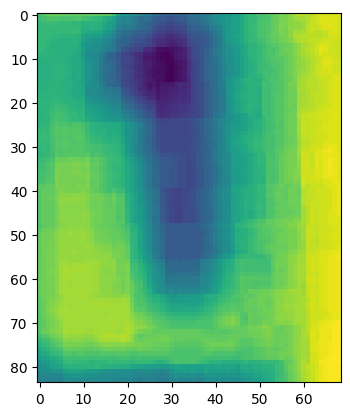

In [16]:
# from google.colab import files
from keras.utils import load_img, img_to_array
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# uploaded= files.upload()

# for fn in uploaded.keys():
path='C:/Users/ADMIN/Documents/VS_Code/Cpp_Image/picture_idetify1.jpg'
plt.imshow(mpimg.imread(path))

img=tf.keras.utils.load_img(path,target_size=(48,48))
x=tf.keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)
images= np.vstack([x])
y_predict = model.predict(images, batch_size=10)
print('Gia tri du doan:', label[np.argmax(y_predict)])

In [13]:
model.layers

In [14]:
output_layers=[
    layer.output for layer in model.layers
]

In [15]:
output_layers

[<KerasTensor: shape=(None, 46, 46, 4) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 46, 46, 4) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 23, 23, 4) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 21, 21, 8) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 10, 10, 8) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 4, 4, 16) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 80) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]